In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None
plt.style.use('seaborn-deep')
plt.style.use("seaborn-darkgrid")

In [3]:
df = pd.read_csv('../data/test.csv')
df

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,0.32,Ideal,I,SI1,60.5,58.0,4.43,4.49,2.70
1,1,1.24,Premium,I,SI1,62.9,60.0,6.80,6.74,4.26
2,2,1.66,Premium,D,SI1,62.0,59.0,7.55,7.60,4.70
3,3,0.75,Premium,D,SI2,60.6,56.0,5.94,5.90,3.59
4,4,1.50,Fair,E,SI2,64.8,55.0,7.26,7.15,4.67
...,...,...,...,...,...,...,...,...,...,...
13480,13480,1.10,Premium,G,SI1,59.6,60.0,6.74,6.70,4.00
13481,13481,0.90,Very Good,D,SI1,62.1,60.0,6.14,6.20,3.83
13482,13482,0.30,Ideal,F,VS2,62.1,53.3,4.30,4.32,2.68
13483,13483,1.25,Ideal,I,SI1,59.6,59.0,7.01,7.09,4.20


In [4]:
df.drop('id', axis=1, inplace=True)
new_columns = ['weight', 'quality', 'color', 'clarity', 'depth_percent', 'table_percent', 'x', 'y', 'z']
df.columns = new_columns
df['depth_percent'] = df['depth_percent'] / 100
df['table_percent'] = df['table_percent'] / 100
df.drop(['x', 'y', 'z'], axis=1, inplace=True) #drop 'x', 'y', 'z' columns

#split categorical and numerical variables
col_num = df.select_dtypes(include = np.number).columns
col_cat = df.select_dtypes(include = 'object').columns
print('numerical columns:', col_num)
print('categorical columns:', col_cat)
print('numerical shape:', df.shape)
df

numerical columns: Index(['weight', 'depth_percent', 'table_percent'], dtype='object')
categorical columns: Index(['quality', 'color', 'clarity'], dtype='object')
numerical shape: (13485, 6)


,weight,quality,color,clarity,depth_percent,table_percent
0,0.32,Ideal,I,SI1,0.605,0.580
1,1.24,Premium,I,SI1,0.629,0.600
2,1.66,Premium,D,SI1,0.620,0.590
3,0.75,Premium,D,SI2,0.606,0.560
4,1.50,Fair,E,SI2,0.648,0.550
...,...,...,...,...,...,...
13480,1.10,Premium,G,SI1,0.596,0.600
13481,0.90,Very Good,D,SI1,0.621,0.600
13482,0.30,Ideal,F,VS2,0.621,0.533
13483,1.25,Ideal,I,SI1,0.596,0.590


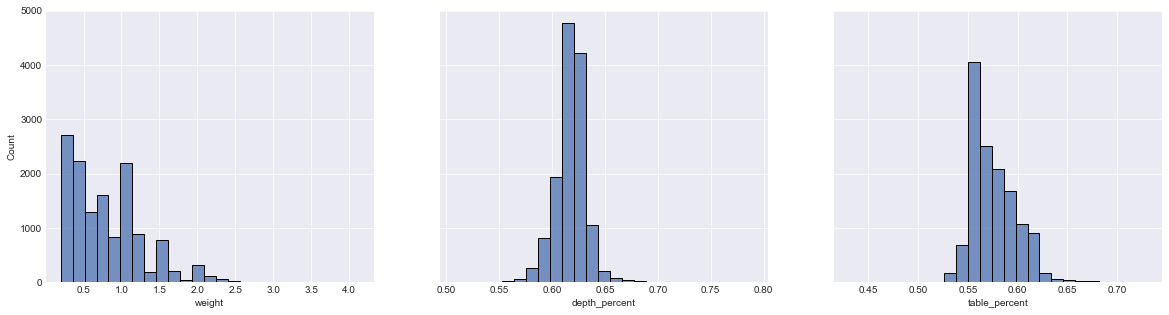

In [7]:
#plot numerical variables distribution
fig, ax = plt.subplots(1, 3, figsize = (20,5), sharey=True)
ax = ax.flat
df_num = df[col_num]
counter = 0
for i in df_num.columns:
    sns.histplot(df_num[i], kde = False, ax = ax[counter], bins=25)
    counter += 1
plt.show();

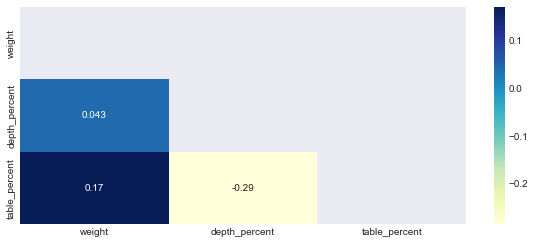

In [8]:
#headmap corr plot
fig, axes = plt.subplots(figsize = (10, 4))
mask = np.triu(np.ones_like(df[col_num].corr(), dtype = np.bool))
sns.heatmap(df[col_num].corr(), 
           cmap = "YlGnBu", 
            mask = mask,
           annot = True);

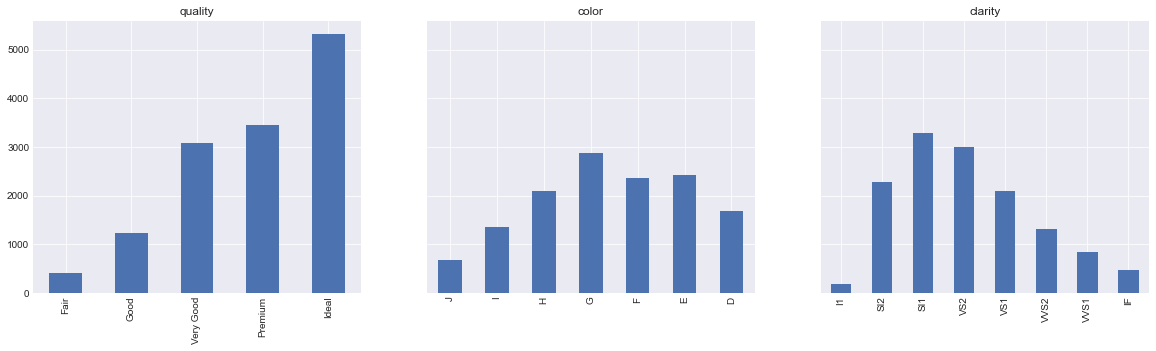

In [9]:
#plot categorical variables distribution
mapping = {'quality':['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'], 
            'color':['J', 'I', 'H', 'G', 'F', 'E', 'D'],
            'clarity':['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']}
fig, ax = plt.subplots(1, 3, figsize = (20,5), sharey=True)
ax = ax.flat
counter = 0
for i in df[col_cat].columns:
    df[i].value_counts().loc[mapping[i]].plot.bar(ax=ax[counter]).set_title(i)
    counter += 1
plt.show();    

In [10]:
df.describe(include='all').T.sort_values(by='unique', ascending=True)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
quality,13485,5,Ideal,5321,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,13485,7,G,2882,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,13485,8,SI1,3286,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weight,13485.0,NaN,NaN,NaN,0.799032,0.468195,0.2,0.4,0.71,1.04,4.13
depth_percent,13485.0,NaN,NaN,NaN,0.617585,0.0142,0.508,0.611,0.619,0.625,0.79
table_percent,13485.0,NaN,NaN,NaN,0.574737,0.022343,0.43,0.56,0.57,0.59,0.73


In [16]:
#export to csv
df = df[['weight', 'quality', 'color', 'clarity', 'table_percent', 'depth_percent']] #change columns order
df.to_csv('../data/test_data_cleaned.csv', index=False)

In [17]:

df

,weight,quality,color,clarity,table_percent,depth_percent
0,0.32,Ideal,I,SI1,0.580,0.605
1,1.24,Premium,I,SI1,0.600,0.629
2,1.66,Premium,D,SI1,0.590,0.620
3,0.75,Premium,D,SI2,0.560,0.606
4,1.50,Fair,E,SI2,0.550,0.648
...,...,...,...,...,...,...
13480,1.10,Premium,G,SI1,0.600,0.596
13481,0.90,Very Good,D,SI1,0.600,0.621
13482,0.30,Ideal,F,VS2,0.533,0.621
13483,1.25,Ideal,I,SI1,0.590,0.596
